In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np

## Import data

In [2]:
fname = "lbrprices_transformed_v2.csv"
prices = pd.read_csv(fname, index_col="fecha_hora").dropna()
prices.head(5)

price    Ph-24    Ph-25    Ph-26    Ph-27    Ph-28  \
fecha_hora                                                               
09/08/2016 00:00  95.3264  54.8461  45.1982  44.7123  46.2995  42.9422   
09/08/2016 01:00  82.8532  52.2179  54.8461  45.1982  44.7123  46.2995   
09/08/2016 02:00  57.9764  61.9198  52.2179  54.8461  45.1982  44.7123   
09/08/2016 03:00  67.6407  36.8105  61.9198  52.2179  54.8461  45.1982   
09/08/2016 04:00  66.4892  34.8274  36.8105  61.9198  52.2179  54.8461   

                    Ph-29    Ph-30    Ph-31    Ph-32       ...         \
fecha_hora                                                 ...          
09/08/2016 00:00  44.3551  46.3440  45.6826  42.6676       ...          
09/08/2016 01:00  42.9422  44.3551  46.3440  45.6826       ...          
09/08/2016 02:00  46.2995  42.9422  44.3551  46.3440       ...          
09/08/2016 03:00  44.7123  46.2995  42.9422  44.3551       ...          
09/08/2016 04:00  45.1982  44.7123  46.2995  42.9422       ...          

                  month_December  month_February  month_January  month_July  \
fecha_hora                                                                    
09/08/2016 00:00               0               0              0           0   
09/08/2016 01:00               0               0              0           0   
09/08/2016 02:00               0               0              0           0   
09/08/2016 03:00               0               0              0           0   
09/08/2016 04:00               0               0              0           0   

                  month_June  month_March  month_May  month_November  \
fecha_hora                                                             
09/08/2016 00:00           0            0          0               0   
09/08/2016 01:00           0            0          0               0   
09/08/2016 02:00           0            0          0               0   
09/08/2016 03:00           0            0          0               0   
09/08/2016 04:00           0            0          0               0   

                  month_October  month_September  
fecha_hora                                        
09/08/2016 00:00              0                1  
09/08/2016 01:00              0                1  
09/08/2016 02:00              0                1  
09/08/2016 03:00              0                1  
09/08/2016 04:00              0                1  

[5 rows x 94 columns]

In [3]:
prices.describe()

price         Ph-24         Ph-25         Ph-26         Ph-27  \
count  20520.000000  20520.000000  20520.000000  20520.000000  20520.000000   
mean      72.093873     72.053371     72.051262     72.048388     72.043583   
std       34.183615     34.176714     34.177036     34.176854     34.173544   
min       18.704900     18.704900     18.704900     18.704900     18.704900   
25%       48.164400     48.156475     48.154175     48.152250     48.147300   
50%       65.084300     65.010100     65.008500     65.007250     65.002250   
75%       88.620925     88.541800     88.541800     88.531450     88.526450   
max      329.440000    329.440000    329.440000    329.440000    329.440000   

              Ph-28         Ph-29         Ph-30         Ph-31         Ph-32  \
count  20520.000000  20520.000000  20520.000000  20520.000000  20520.000000   
mean      72.039969     72.035831     72.032904     72.029738     72.025476   
std       34.172700     34.170911     34.170539     34.169971     34.168179   
min       18.704900     18.704900     18.704900     18.704900     18.704900   
25%       48.145375     48.140500     48.134600     48.132500     48.130500   
50%       64.996600     64.995100     64.993600     64.989550     64.985950   
75%       88.521425     88.517825     88.516725     88.513675     88.496425   
max      329.440000    329.440000    329.440000    329.440000    329.440000   

            ...         month_December  month_February  month_January  \
count       ...           20520.000000    20520.000000   20520.000000   
mean        ...               0.077193        0.070175       0.077193   
std         ...               0.266904        0.255449       0.266904   
min         ...               0.000000        0.000000       0.000000   
25%         ...               0.000000        0.000000       0.000000   
50%         ...               0.000000        0.000000       0.000000   
75%         ...               0.000000        0.000000       0.000000   
max         ...               1.000000        1.000000       1.000000   

         month_July    month_June   month_March     month_May  month_November  \
count  20520.000000  20520.000000  20520.000000  20520.000000    20520.000000   
mean       0.077193      0.074854      0.077193      0.077193        0.097076   
std        0.266904      0.263162      0.266904      0.266904        0.296068   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000        0.000000   
50%        0.000000      0.000000      0.000000      0.000000        0.000000   
75%        0.000000      0.000000      0.000000      0.000000        0.000000   
max        1.000000      1.000000      1.000000      1.000000        1.000000   

       month_October  month_September  
count   20520.000000     20520.000000  
mean        0.100585         0.097076  
std         0.300785         0.296068  
min         0.000000         0.000000  
25%         0.000000         0.000000  
50%         0.000000         0.000000  
75%         0.000000         0.000000  
max         1.000000         1.000000  

[8 rows x 94 columns]

### Choosing features and targe

In [4]:
X = prices.drop(["price"], axis=1)
y = prices["price"]

In [5]:
y.head(5)

fecha_hora
09/08/2016 00:00    95.3264
09/08/2016 01:00    82.8532
09/08/2016 02:00    57.9764
09/08/2016 03:00    67.6407
09/08/2016 04:00    66.4892
Name: price, dtype: float64

In [6]:
X.head(5)

Ph-24    Ph-25    Ph-26    Ph-27    Ph-28    Ph-29  \
fecha_hora                                                               
09/08/2016 00:00  54.8461  45.1982  44.7123  46.2995  42.9422  44.3551   
09/08/2016 01:00  52.2179  54.8461  45.1982  44.7123  46.2995  42.9422   
09/08/2016 02:00  61.9198  52.2179  54.8461  45.1982  44.7123  46.2995   
09/08/2016 03:00  36.8105  61.9198  52.2179  54.8461  45.1982  44.7123   
09/08/2016 04:00  34.8274  36.8105  61.9198  52.2179  54.8461  45.1982   

                    Ph-30    Ph-31    Ph-32    Ph-33       ...         \
fecha_hora                                                 ...          
09/08/2016 00:00  46.3440  45.6826  42.6676  39.0872       ...          
09/08/2016 01:00  44.3551  46.3440  45.6826  42.6676       ...          
09/08/2016 02:00  42.9422  44.3551  46.3440  45.6826       ...          
09/08/2016 03:00  46.2995  42.9422  44.3551  46.3440       ...          
09/08/2016 04:00  44.7123  46.2995  42.9422  44.3551       ...          

                  month_December  month_February  month_January  month_July  \
fecha_hora                                                                    
09/08/2016 00:00               0               0              0           0   
09/08/2016 01:00               0               0              0           0   
09/08/2016 02:00               0               0              0           0   
09/08/2016 03:00               0               0              0           0   
09/08/2016 04:00               0               0              0           0   

                  month_June  month_March  month_May  month_November  \
fecha_hora                                                             
09/08/2016 00:00           0            0          0               0   
09/08/2016 01:00           0            0          0               0   
09/08/2016 02:00           0            0          0               0   
09/08/2016 03:00           0            0          0               0   
09/08/2016 04:00           0            0          0               0   

                  month_October  month_September  
fecha_hora                                        
09/08/2016 00:00              0                1  
09/08/2016 01:00              0                1  
09/08/2016 02:00              0                1  
09/08/2016 03:00              0                1  
09/08/2016 04:00              0                1  

[5 rows x 93 columns]

### Train/test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
print("Training features/target: ", X_train.shape, y_train.shape)
print("Testing freatures/targe: ", X_test.shape, y_test.shape)

Training features/target:  (15390, 93) (15390,)
Testing freatures/targe:  (5130, 93) (5130,)


### Reshape Arrays for model

In [8]:
y_train = y_train.values.reshape(-1 ,1)
y_test = y_test.values.reshape(-1 , 1)

## Cross-Validation and Hyper-parameters | SVR

In [9]:
# Import Pipeline and GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

### Base SVR kernel='rbf'

In [10]:
pipe = Pipeline([
    ('standarscaler', StandardScaler()),
    ('regressor', SVR(kernel='rbf'))
])

In [11]:
%%time
pipe.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 31.7 s


Pipeline(memory=None,
     steps=[('standarscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [12]:
pipe.score(X_test, y_test.ravel())

C:\anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.6202242338800369

In [14]:
%timeit
y_pred_1 = pipe.predict(X_test)
y_pred_1.shape


C:\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


(5130,)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae1 = mean_absolute_error(y_test, y_pred_1)
mse1 = mean_squared_error(y_test, y_pred_1)
print("MAE: {}".format(mae1))
print("MSE: {}".format(mse1))
print("RMSE: {}".format(np.sqrt(mse1)))

MAE: 13.305437540771377
MSE: 434.06748706043726
RMSE: 20.8342863343201


<IPython.core.display.Javascript object>


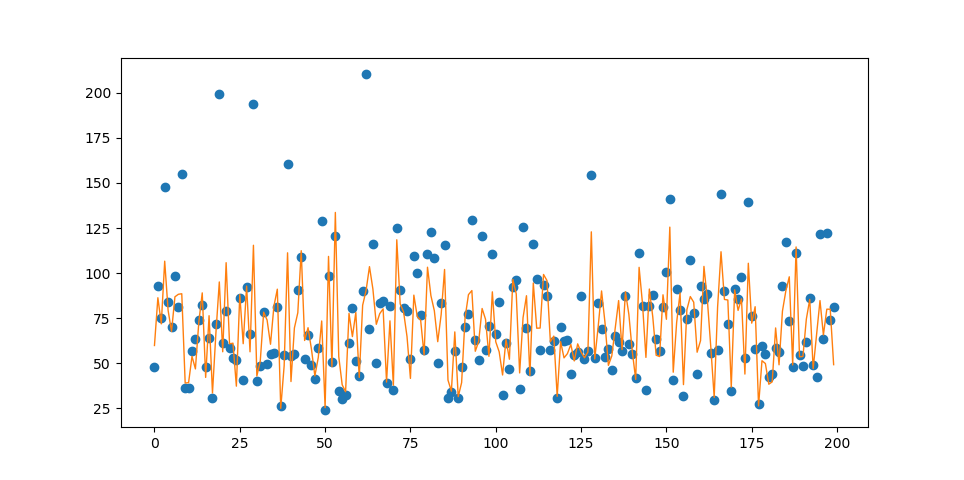

In [18]:
import matplotlib.pyplot as plt

plt.plot(y_test[100:300], "o")
plt.plot(y_pred_1[100:300], linewidth=1)
plt.show()

### Kernel test

In [20]:
kernels = ['linear', 'poly', 'sigmoid', 'rbf']

hyperparameters = {'regressor__kernel': kernels,
                  }

svr_rgs = GridSearchCV(pipe, hyperparameters, cv=5, verbose=10, n_jobs=4)
svr_rgs.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:  3.7min remaining:   55.3s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  4.5min finished
C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standarscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'regressor__kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [21]:
svr_rgs.best_params_

{'regressor__kernel': 'rbf'}

In [22]:
svr_rgs.best_score_

0.5990587035599976

## PCA to improve model

In [23]:
from sklearn.decomposition import PCA

Make an instance of the model

In [24]:
pca = PCA()

Fit PCA to training set.

In [25]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.components_

array([[ 1.16340058e-01,  1.17343727e-01,  1.18670570e-01, ...,
        -1.33455680e-04, -5.59886814e-05,  4.02600975e-05],
       [-1.26494632e-02, -1.49819252e-02, -1.72271512e-02, ...,
        -1.75764081e-05, -3.73489701e-05, -6.63156307e-05],
       [ 1.13015911e-01,  1.42859178e-01,  1.72554267e-01, ...,
         6.17693870e-05, -7.93512123e-05, -6.55821463e-05],
       ...,
       [-9.49287789e-04, -1.94039740e-04, -1.89936929e-04, ...,
        -7.66115875e-02, -2.76650157e-02,  2.04576540e-02],
       [-0.00000000e+00, -5.05222202e-18, -7.77511376e-18, ...,
         9.64903110e-02,  9.64903110e-02,  9.64903110e-02],
       [-0.00000000e+00,  1.39360871e-17,  2.23599419e-16, ...,
         2.72071596e-01,  2.72071596e-01,  2.72071596e-01]])

In [28]:
pca.n_features_

93

In [29]:
train_X = pca.transform(X_train)

In [30]:
pipe.fit(train_X, y_train.ravel())

Pipeline(memory=None,
     steps=[('standarscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [32]:
explained_variance = pca.explained_variance_ratio_ 

<IPython.core.display.Javascript object>


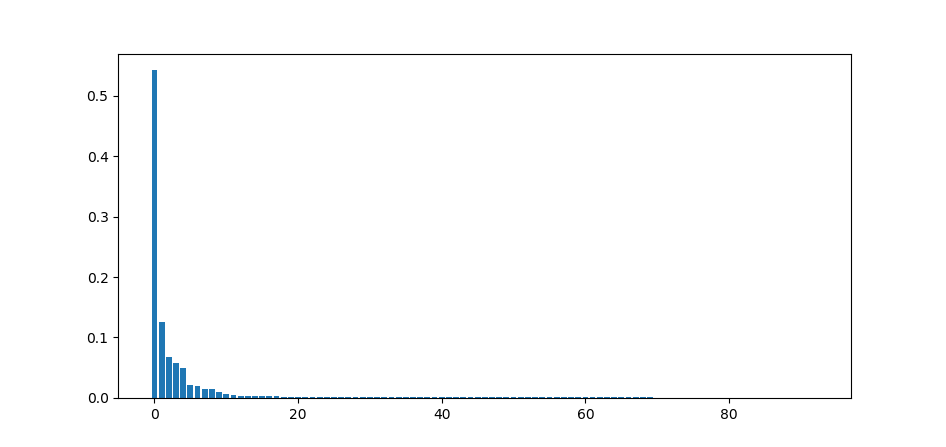

In [47]:
plt.bar(np.arange(len(explained_variance)),explained_variance)
plt.show()

In [51]:
%%time
pca = PCA(0.95)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

Wall time: 90.8 ms


In [52]:
pca.explained_variance_ratio_

array([0.54292225, 0.12577256, 0.06716   , 0.05823625, 0.04924647,
       0.02196185, 0.02014353, 0.01457182, 0.01425445, 0.00985014,
       0.00591487, 0.00408719, 0.00333382, 0.00288473, 0.00278578,
       0.00255025, 0.00251787, 0.00225158])

<IPython.core.display.Javascript object>


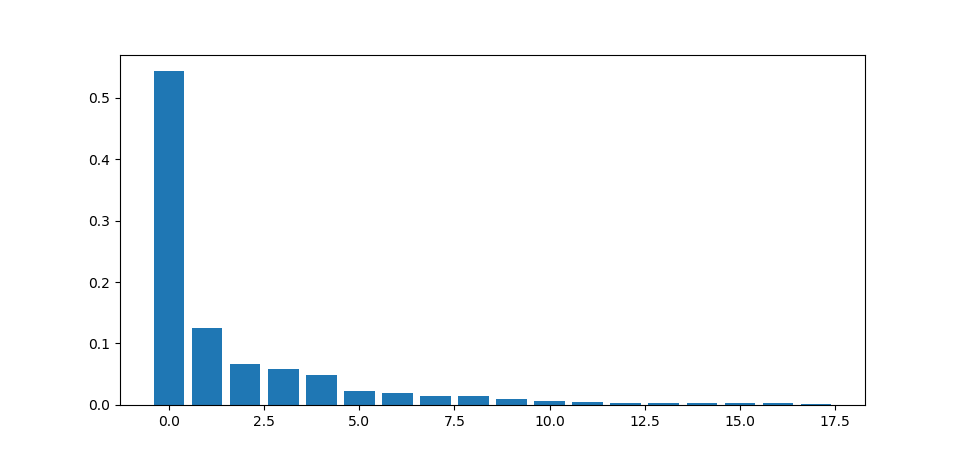

In [54]:
plt.bar(np.arange(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.show()

In [55]:
%%time
pipe.fit(pca_train, y_train.ravel())

Wall time: 9.27 s


Pipeline(memory=None,
     steps=[('standarscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [56]:
pipe.score(pca_test, y_test.ravel())

0.5503856063131106

In [50]:
pca.explained_variance_ratio_

array([0.54292225, 0.12577256])

<IPython.core.display.Javascript object>


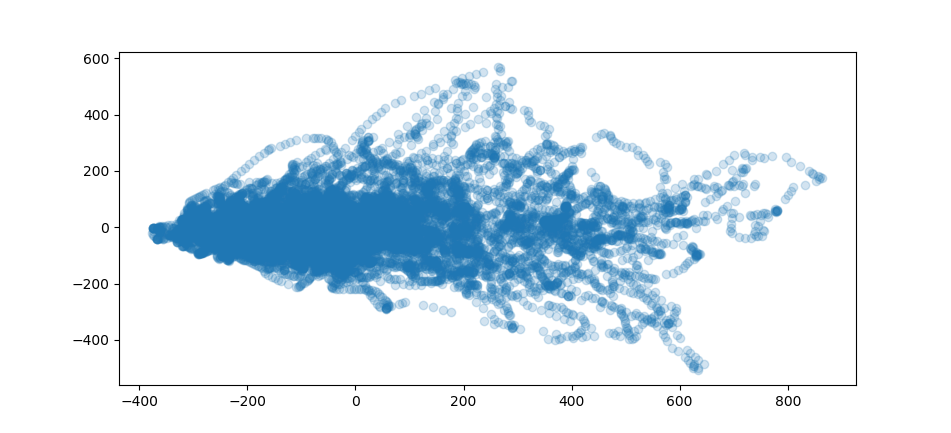

In [59]:
plt.scatter(pca_train[:,0], pca_train[:,1], alpha=0.2)
plt.xlabel="Component 1"
plt.ylabel="Component 2"
plt.title="Principal Components"
plt.show()

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [62]:
%%time
pca = PCA(0.95)
pca_train = pca.fit_transform(X_train_sc)
pca_test = pca.transform(X_test_sc)

Wall time: 70.5 ms


<IPython.core.display.Javascript object>


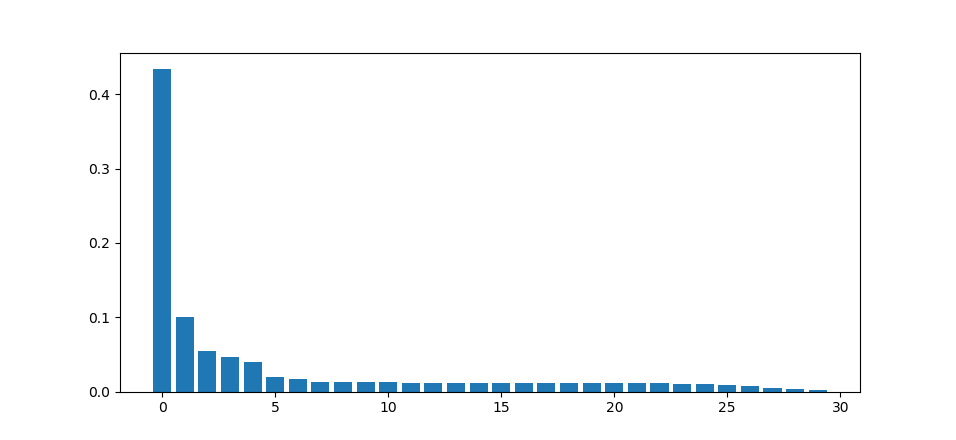

In [63]:
plt.bar(np.arange(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.show()

In [70]:
%%time
svr = SVR(kernel='rbf', gamma='auto', C=10)
svr.fit(pca_train, y_train.ravel())

Wall time: 15.6 s


In [71]:
svr.score(pca_test, y_test.ravel())

0.7981810805884192

In [72]:
y_pred_2 = svr.predict(pca_test)

<IPython.core.display.Javascript object>


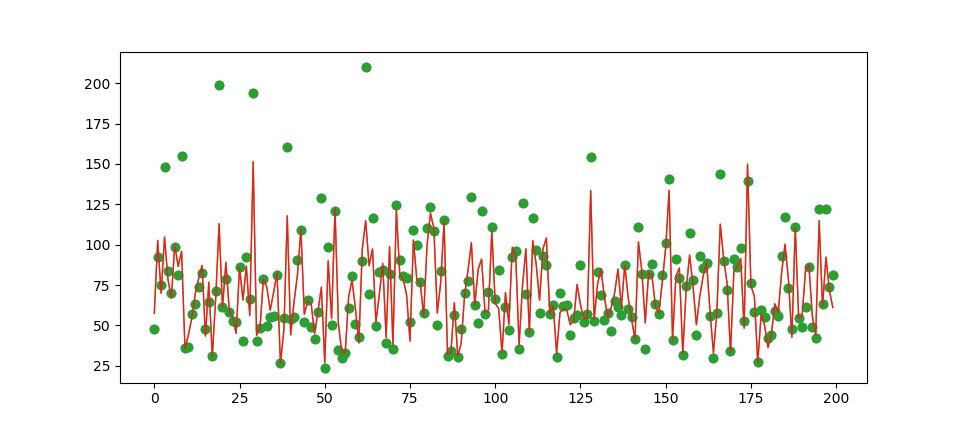

In [73]:
plt.plot(y_test[100:300], "o")
plt.plot(y_pred_2[100:300], linewidth=1)
plt.show()

In [74]:
%%time
svr2 = SVR(kernel='rbf', gamma='auto', C=15)
svr2.fit(pca_train, y_train.ravel())

Wall time: 23 s


In [75]:
svr2.score(pca_test, y_test.ravel())

0.829300757254184

<IPython.core.display.Javascript object>


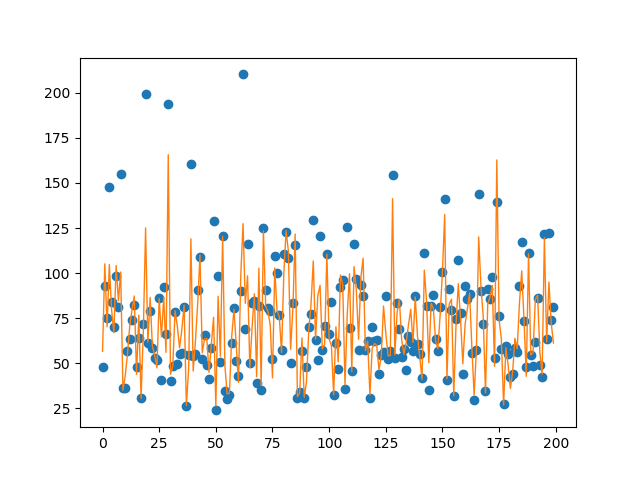

In [96]:
y_pred_2 = svr2.predict(pca_test)
plt.plot(y_test[100:300], "o")
plt.plot(y_pred_2[100:300], linewidth=1)
plt.show()

<IPython.core.display.Javascript object>


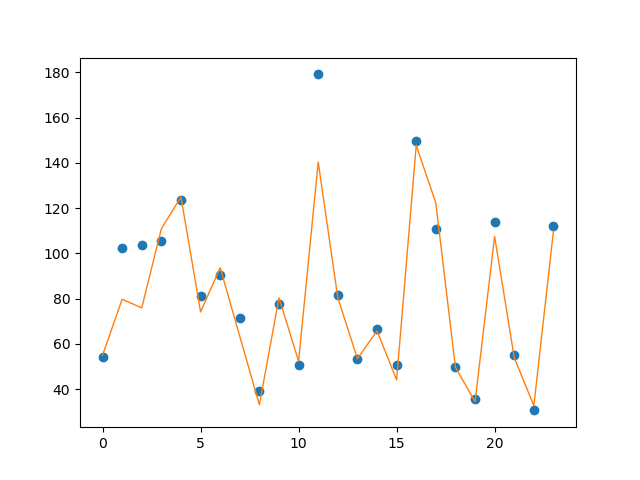

In [100]:
plt.plot(y_test[300:324], "o")
plt.plot(y_pred_2[300:324], linewidth=1)
plt.show()

In [98]:
mae2 = mean_absolute_error(y_test, y_pred_2)
mse2 = mean_squared_error(y_test, y_pred_2)
print("MAE: {}".format(mae2))
print("MSE: {}".format(mse2))
print("RMSE: {}".format(np.sqrt(mse2)))

MAE: 7.531617341722956
MSE: 195.10194686406336
RMSE: 13.967889850083418


In [89]:
%%time
svr3 = SVR(kernel='rbf', C=15, gamma=0.05)
svr3.fit(pca_train, y_train.ravel())

Wall time: 35 s


In [90]:
svr3.score(pca_test, y_test.ravel())

0.8449547039001476

In [ ]:
y_pred_3 = svr3.predict(pca_test)

<IPython.core.display.Javascript object>


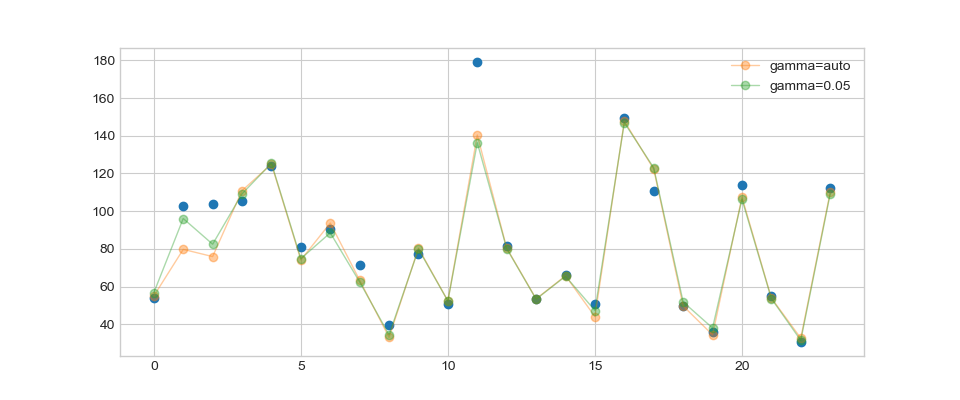

In [102]:
plt.style.use('seaborn-whitegrid')
plt.plot(y_test[300:324], "o")
plt.plot(y_pred_2[300:324], '-o', linewidth=1, alpha=0.4, label='gamma=auto')
plt.plot(y_pred_3[300:324], '-o', linewidth=1, alpha=0.4, label='gamma=0.05')
plt.legend()
plt.show()

In [93]:
y_pred_2 - y_pred_3

array([0., 0., 0., ..., 0., 0., 0.])

In [103]:
mae3 = mean_absolute_error(y_test, y_pred_3)
mse3 = mean_squared_error(y_test, y_pred_3)
print("MAE: {}".format(mae3))
print("MSE: {}".format(mse3))
print("RMSE: {}".format(np.sqrt(mse3)))

MAE: 6.829696512020734
MSE: 177.21015415540148
RMSE: 13.31203042948


In [106]:
%%time
svr4 = SVR(kernel='rbf', C=100, gamma=0.05)
svr4.fit(pca_train, y_train.ravel())

Wall time: 3min 27s


In [107]:
svr4.score(pca_test, y_test.ravel())

0.9106459392935141

In [108]:
y_pred_4 = svr4.predict(pca_test)

<IPython.core.display.Javascript object>


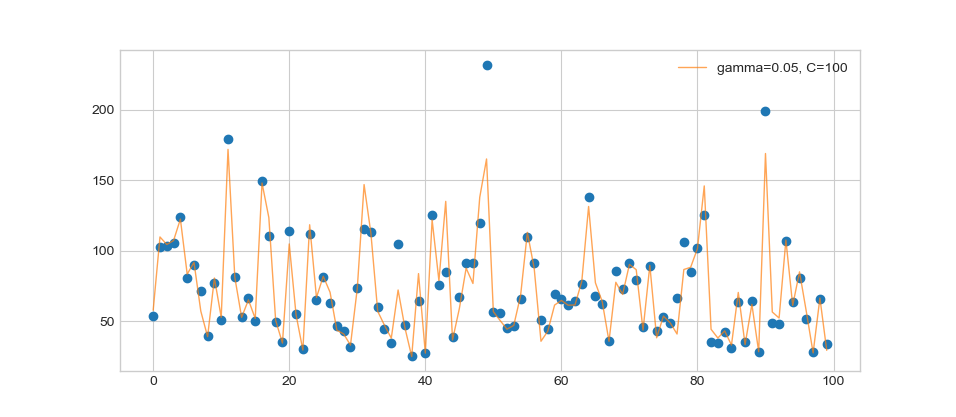

In [114]:
plt.style.use('seaborn-whitegrid')
plt.plot(y_test[300:400], "o")
#plt.plot(y_pred_3[300:400], '-o', linewidth=1, alpha=0.4, label='gamma=0.05, C=15')
plt.plot(y_pred_4[300:400], linewidth=1, alpha=0.7, label='gamma=0.05, C=100')
plt.legend()
plt.show()

In [111]:
mae4 = mean_absolute_error(y_test, y_pred_4)
mse4 = mean_squared_error(y_test, y_pred_4)
print("MAE: {}".format(mae4))
print("MSE: {}".format(mse4))
print("RMSE: {}".format(np.sqrt(mse4)))

MAE: 5.16079216440072
MSE: 102.12787663038642
RMSE: 10.105833791943464


## SVR Pipeline

In [116]:
svrpipe = Pipeline([
    ('standarscaler', StandardScaler()),
    ('pca', pca),
    ('regressor', SVR(kernel='rbf', C=100, gamma=0.05))
])

In [117]:
X_train

Ph-24     Ph-25     Ph-26     Ph-27     Ph-28     Ph-29  \
fecha_hora                                                                     
24/10/2018 04:00   62.0336   63.7085   70.2444   70.7946   90.6795   96.1702   
07/09/2018 05:00   79.1030   63.9443   66.2582   96.2362  116.4281  128.8701   
09/01/2017 19:00   39.2683   38.4852   30.3583   30.0168   30.2148   30.1679   
05/12/2016 06:00   29.6552   30.0035   29.9686   30.2936   30.5585   30.3091   
13/11/2018 10:00  108.4272  106.4169   98.9055   79.6178   62.6484   45.0183   
30/06/2018 19:00  202.7817  120.2459  114.5061  118.5899  142.3258  121.7742   
21/09/2018 05:00  100.6811  101.8826  106.8609  113.6781  127.7593  124.2647   
19/11/2018 14:00   67.2766   68.3800   68.1965   67.6891   66.2168   59.5499   
14/02/2017 13:00   55.0501   54.7273   51.8899   52.2250   51.1252   46.2525   
26/07/2017 23:00   64.6588   76.9961   77.4652   70.3744   69.0864   73.5818   
12/04/2018 07:00   79.9323   73.5946   57.4329   54.4245   55.4324   64.9948   
23/04/2018 06:00   53.5443   52.7481   51.7545   53.2537   53.6338   55.3729   
21/12/2017 05:00   32.9890   30.6296   30.5296   31.4825   35.1067   44.9110   
27/08/2016 04:00   39.1221   38.6468   52.5882   63.0197   63.2517   60.7145   
24/01/2017 04:00   27.5630   27.7677   28.0777   29.1261   30.7866   34.7545   
06/05/2017 22:00   66.9831   76.5517   83.5458   67.6796  112.8092   61.5382   
11/10/2018 05:00   52.7754   68.8852   68.8899   71.0139   67.1946   78.5905   
28/11/2016 09:00   22.9267   21.8927   22.0584   22.0719   22.1107   22.0981   
02/08/2018 01:00  124.9033  125.3632  124.9229  135.4568  127.0489  170.1710   
06/12/2018 21:00  112.1568  120.6247  104.5916  116.1915   99.3905  120.3433   
29/03/2018 22:00  133.4957  120.7033  136.0745  136.8717  109.8511  132.0239   
26/10/2018 14:00   99.6040   96.0196  104.7548  106.3062  105.3224  104.6004   
16/05/2018 01:00  115.3171  123.3730   85.0342   98.4894  102.6726   93.3665   
01/11/2016 05:00   27.1623   24.5041   24.7238   25.3681   27.0659   28.1332   
10/01/2018 19:00   55.3767   53.4946   52.1356   52.4003   53.6995   53.7629   
30/01/2017 03:00   27.7096   27.9328   28.3866   30.1524   35.3057   43.1698   
15/10/2016 20:00   71.0518   71.9358   76.5787   72.3491   73.6643   73.8391   
11/09/2017 12:00   41.2894   40.6061   40.7575   38.1523   37.7004   37.6649   
12/12/2016 13:00   47.2502   48.0087   47.0844   47.0456   46.5552   41.3994   
11/10/2017 11:00   93.3596   94.4901   86.7079   92.7601   87.0246   84.6366   
...                    ...       ...       ...       ...       ...       ...   
10/09/2017 01:00   50.6802   50.3483   55.1544   55.5824   54.6353   53.1856   
06/01/2017 06:00   35.1445   32.7360   30.4178   30.7801   33.0706   35.8596   
20/10/2018 13:00  145.1181  147.9180  140.2396  131.9554  100.5518  111.5067   
08/02/2017 23:00   59.4246   83.4498   92.5576  105.5635  108.6780   90.5841   
20/09/2016 23:00   67.1065   65.7573   70.2805   64.1280   67.2902   66.3794   
27/04/2017 21:00   95.7126   97.0838   83.4924   85.6162   86.5886   98.6992   
24/09/2016 06:00   32.6883   35.7044   40.7624   38.2377   76.6661   68.3486   
09/09/2018 08:00   83.8904   81.9074   74.4707  102.2899  128.3038  113.4641   
11/12/2017 06:00   28.2332   28.9940   29.1999   29.3963   29.5182   29.8646   
24/07/2018 01:00   82.3517  137.4909   58.5576   60.6344   61.2892   59.9900   
27/10/2018 17:00   76.7114   85.0328   84.2010   84.8910   85.6642   82.9176   
16/07/2018 02:00   52.7425   52.0348   52.2911   74.5621   84.5442   84.3861   
23/02/2017 12:00   51.0898   48.7408   48.4140   46.9755   43.3465   41.7728   
18/11/2018 02:00   56.6908   63.8369   74.0691   79.9629   80.6365   81.4338   
26/07/2017 20:00   70.3744   69.0864   73.5818   73.7723   72.2152   70.8057   
05/10/2018 12:00   91.6726   85.8948   72.8581   61.6987   57.7228   55.2075   
10/12/2016 10:00   54.7429   51.9402   43.3024   36.2755   33.6519   33.2122   
17/01/2018 21:00   75

In [118]:
svrpipe.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('standarscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('regressor', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [119]:
svrpipe.score(X_test, y_test)

C:\anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9106459392935141

In [121]:
import pickle

pickle.dump(svrpipe, open("../models/lbrprice_model_svr.pkl","wb"))

In [127]:
X

Ph-24     Ph-25     Ph-26     Ph-27     Ph-28     Ph-29  \
fecha_hora                                                                     
09/08/2016 00:00   54.8461   45.1982   44.7123   46.2995   42.9422   44.3551   
09/08/2016 01:00   52.2179   54.8461   45.1982   44.7123   46.2995   42.9422   
09/08/2016 02:00   61.9198   52.2179   54.8461   45.1982   44.7123   46.2995   
09/08/2016 03:00   36.8105   61.9198   52.2179   54.8461   45.1982   44.7123   
09/08/2016 04:00   34.8274   36.8105   61.9198   52.2179   54.8461   45.1982   
09/08/2016 05:00   34.5824   34.8274   36.8105   61.9198   52.2179   54.8461   
09/08/2016 06:00   49.4481   34.5824   34.8274   36.8105   61.9198   52.2179   
09/08/2016 07:00   55.6721   49.4481   34.5824   34.8274   36.8105   61.9198   
09/08/2016 08:00   57.0974   55.6721   49.4481   34.5824   34.8274   36.8105   
09/08/2016 09:00   67.0368   57.0974   55.6721   49.4481   34.5824   34.8274   
09/08/2016 10:00   54.4681   67.0368   57.0974   55.6721   49.4481   34.5824   
09/08/2016 11:00   54.4450   54.4681   67.0368   57.0974   55.6721   49.4481   
09/08/2016 12:00   54.0250   54.4450   54.4681   67.0368   57.0974   55.6721   
09/08/2016 13:00   56.3392   54.0250   54.4450   54.4681   67.0368   57.0974   
09/08/2016 14:00   66.5473   56.3392   54.0250   54.4450   54.4681   67.0368   
09/08/2016 15:00   58.8738   66.5473   56.3392   54.0250   54.4450   54.4681   
09/08/2016 16:00   60.1973   58.8738   66.5473   56.3392   54.0250   54.4450   
09/08/2016 17:00   59.7477   60.1973   58.8738   66.5473   56.3392   54.0250   
09/08/2016 18:00   59.9345   59.7477   60.1973   58.8738   66.5473   56.3392   
09/08/2016 19:00   56.9154   59.9345   59.7477   60.1973   58.8738   66.5473   
09/08/2016 20:00   64.5378   56.9154   59.9345   59.7477   60.1973   58.8738   
09/08/2016 21:00   58.5528   64.5378   56.9154   59.9345   59.7477   60.1973   
09/08/2016 22:00   58.9723   58.5528   64.5378   56.9154   59.9345   59.7477   
09/08/2016 23:00   68.2423   58.9723   58.5528   64.5378   56.9154   59.9345   
10/08/2016 00:00   95.3264   68.2423   58.9723   58.5528   64.5378   56.9154   
10/08/2016 01:00   82.8532   95.3264   68.2423   58.9723   58.5528   64.5378   
10/08/2016 02:00   57.9764   82.8532   95.3264   68.2423   58.9723   58.5528   
10/08/2016 03:00   67.6407   57.9764   82.8532   95.3264   68.2423   58.9723   
10/08/2016 04:00   66.4892   67.6407   57.9764   82.8532   95.3264   68.2423   
10/08/2016 05:00   68.6807   66.4892   67.6407   57.9764   82.8532   95.3264   
...                    ...       ...       ...       ...       ...       ...   
10/12/2018 18:00   69.6707   67.0344   58.5975   58.9433   60.2477   61.7710   
10/12/2018 19:00   73.3712   69.6707   67.0344   58.5975   58.9433   60.2477   
10/12/2018 20:00   69.1453   73.3712   69.6707   67.0344   58.5975   58.9433   
10/12/2018 21:00   70.0111   69.1453   73.3712   69.6707   67.0344   58.5975   
10/12/2018 22:00   66.9332   70.0111   69.1453   73.3712   69.6707   67.0344   
10/12/2018 23:00   59.1993   66.9332   70.0111   69.1453   73.3712   69.6707   
11/12/2018 00:00   51.8596   59.1993   66.9332   70.0111   69.1453   73.3712   
11/12/2018 01:00   47.1863   51.8596   59.1993   66.9332   70.0111   69.1453   
11/12/2018 02:00   46.0043   47.1863   51.8596   59.1993   66.9332   70.0111   
11/12/2018 03:00   45.0487   46.0043   47.1863   51.8596   59.1993   66.9332   
11/12/2018 04:00   45.3595   45.0487   46.0043   47.1863   51.8596   59.1993   
11/12/2018 05:00   48.9978   45.3595   45.0487   46.0043   47.1863   51.8596   
11/12/2018 06:00   67.7778   48.9978   45.3595   45.0487   46.0043   47.1863   
11/12/2018 07:00   80.6690   67.7778   48.9978   45.3595   45.0487   46.0043   
11/12/2018 08:00  105.9934   80.6690   67.7778   48.9978   45.3595   45.0487   
11/12/2018 09:00  110.8088  105.9934   80.6690   67.7778   48.9978   45.3595   
11/12/2018 10:00  116.1816  110.8088  105.9934   80.6690   67.7778   48.9978   
11/12/2018 11:00  122

In [128]:
X2 = X.copy()

In [133]:
X2['day_of_year'] = pd.to_datetime(X.index)

In [134]:
X2['day_of_year'] = X2.day_of_year.dt.dayofyear

In [135]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2,y, random_state = 1)
print("Training features/target: ", X_train_2.shape, y_train_2.shape)
print("Testing freatures/targe: ", X_test_2.shape, y_test_2.shape)

Training features/target:  (15390, 94) (15390,)
Testing freatures/targe:  (5130, 94) (5130,)


In [137]:
X_train_2.shape

(15390, 94)

In [138]:
svrpipe2 = svrpipe

In [140]:
%%time
svrpipe2.fit(X_train_2, y_train)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 3min 12s


Pipeline(memory=None,
     steps=[('standarscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('regressor', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [143]:
svrpipe2.score(X_test_2, y_test)

C:\anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9106833022371192